# Informação detalhada dos atributos

|Atributo|Descrição                                                           |Tipo    |
|--------|:------------------------------------------------------------------:|-------:|
|Age     |idade em anos                                                       |real      |
|sex     | (1 = homem; 0 = mulher)                                             |categórica|
|cp      |tipo de dor no peito                                                |categórica|
|trestbps|pressão arterial em repouso (em mm Hg na admissão no hospital)      |real      |
|chol    |colestoral sérico em mg / dl                                        |real      |
|fbs     |(açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)|categórica|
|restecg |resultados eletrocardiográficos em repouso                          |categórica|
|thalach |frequência cardíaca máxima atingida                                 |real      |
|exang   |angina induzida pelo exercício (1 = sim; 0 = não)                   |categórica|
|oldpeak |depressão do ST induzida por exercício em relação ao repouso        |real      |
|slope   |a inclinação do segmento ST do pico do exercício                    |categórica|
|ca      |número de vasos principais (0–3) coloridos por flourosopy           |categórica|
|thal    |3 = normal; 6 = defeito fixo; 7 = defeito reversível                |categórica|
|alvo    |doença cardiaca representada de 0 a 4                               |categórica|

In [1]:
using DataFrames, CSV, ColorSchemes, StatsPlots, Statistics, Distributions

In [2]:
#buscando o arquivo e colocando o header no dataframe
df = DataFrame(CSV.File("processed.cleveland.csv"))
rename!(df, [:age, :sex, :cp, :trestbps, :chol, :fbs, :restecg, :thalach, :exang, :oldpeak, :slope, :ca, :thal, :target]);

## Tratando os dados
Possuímos alguns ruídos em nosso dataframe que precisam ser resolvidos antes de darmos continuidade a análise dos dados. Como possuímos apenas 1.9% dos dados com missing values, a melhor opção é remover essas instâncias da análise

In [3]:
#limpando os dados

#permitindo missing data no df
allowmissing!(df)

#substituindo todos os dados faltosos "?" por missing values
df .= ifelse.(df .=="?", missing, df)

#removendo as linhas com missing values
dropmissing!(df)

#transformando as duas colunas em float64
df.ca = parse.(Float64, df.ca)
df.thal = parse.(Float64, df.thal);

#passando os dados categóricos para int
df.sex = trunc.(Int, df.sex)
df.cp = trunc.(Int, df.cp)
df.restecg = trunc.(Int, df.restecg)
df.exang = trunc.(Int, df.exang)
df.slope = trunc.(Int, df.slope)
df.ca = trunc.(Int, df.ca)
df.thal = trunc.(Int, df.thal);

## organizando os plots categóricos

In [4]:
#sex distribution
women = size(filter(row -> row.sex == 0,df))[1]
men = size(filter(row -> row.sex == 1, df))[1]

x = ["women", "men"]
y = [women, men]

p1 = bar(x, y, title = "Sex")

#cp distribution
cp1 = size(filter(row -> row.cp == 1, df))[1]
cp2 = size(filter(row -> row.cp == 2, df))[1]
cp3 = size(filter(row -> row.cp == 3, df))[1]
cp4 = size(filter(row -> row.cp == 4, df))[1]

x = ["typical", "atypical", "non-angimical", "asymptomatic"]
y = [cp1, cp2, cp3, cp4]

p2 = bar(x, y, title = "Chest Pain")

#fbs distribution
fbs1 = size(filter(row -> row.fbs == 0, df))[1]
fbs2 = size(filter(row -> row.fbs == 1, df))[1]

x = ["false", "true"]
y = [fbs1, fbs2]

p3 = bar(x, y, title = "FBS")

#exang distribution
ex1 = size(filter(row -> row.exang == 0, df))[1]
ex2 = size(filter(row -> row.exang == 1, df))[1]

x = ["false", "true"]
y = [ex1, ex2]

p4 = bar(x, y, title = "Exercise induced angina")

#slope distribution
slp1 = size(filter(row -> row.slope == 1, df))[1]
slp2 = size(filter(row -> row.slope == 2, df))[1]
slp3 = size(filter(row -> row.slope == 3, df))[1]

x = ["upsloping", "flat", "downsloping"]
y = [slp1, slp2, slp3]

p5 = bar(x, y, title = "Slope")

#ca distribution
ca0 = size(filter(row -> row.ca == 0, df))[1]
ca1 = size(filter(row -> row.ca == 1, df))[1]
ca2 = size(filter(row -> row.ca == 2, df))[1]
ca3 = size(filter(row -> row.ca == 3, df))[1]

x = ["0", "1", "2", "3"]
y = [ca0, ca1, ca2, ca3]

p6 = bar(x, y, title = "CA")

#thal
thal3 = size(filter(row -> row.thal == 3, df))[1]
thal6 = size(filter(row -> row.thal == 6, df))[1]
thal7 = size(filter(row -> row.thal == 7, df))[1]

x = ["normal", "fixed defect", "reversable defect"]
y = [thal3, thal6, thal7]

p7 = bar(x, y, title = "Thal")

#target distribution
target0 = size(filter(row -> row.target == 0, df))[1]
target1 = size(filter(row -> row.target == 1, df))[1]
target2 = size(filter(row -> row.target == 2, df))[1]
target3 = size(filter(row -> row.target == 3, df))[1]
target4 = size(filter(row -> row.target == 4, df))[1]
targetTotal = size(df.target)[1]

x = ["0", "1", "2", "3", "4"]
y = [target0, target1, target2, target3, target4]

p8 = bar(x, y, title = "Target")

#restecg
res0 = size(filter(row -> row.restecg == 0, df))[1]
res1 = size(filter(row -> row.restecg == 1, df))[1]
res2 = size(filter(row -> row.restecg == 2, df))[1]

x = ["normal", "abnormality","left ventricular hypertrophy"]
y = [res0, res1, res2]

p9 = bar(x, y, title = "Restecg");

## Plots categóricos

In [5]:
png(plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, layout=9, size=[1200, 600], leg=false), "plot")

## organizando os plots reais

In [6]:
#
h1 = histogram(df.age, title = "age")
h2 = histogram(df.trestbps, title = "trestbps")
h3 = histogram(df.chol, title = "chol")
h4 = histogram(df.thalach, title = "thalach")
h5 = histogram(df.oldpeak, title = "oldpeak");


## Plot real

In [7]:
png(plot(h1, h2, h3, h4, h5, layout=5, size=[1200, 600], leg=false), "plot2")

## Calculando o balanceamento
Como pudemos ver no gráfico do target, nosso dataset é desbalanceado e segue as seguintes proporções:</br>


In [8]:
println("grau 0: ", round(target0/targetTotal * 100, digits=2), "% ", target0)
println("grau 1: ", round(target1/targetTotal * 100, digits=2), "% ", target1)
println("grau 2: ", round(target2/targetTotal * 100, digits=2), "% ", target2)
println("grau 3: ", round(target3/targetTotal * 100, digits=2), "% ", target3)
println("grau 4: ", round(target4/targetTotal * 100, digits=2), "% ", target4)
println(target1 + target2 + target3 + target4)

grau 0: 53.72% 159
grau 1: 18.24% 54
grau 2: 11.82% 35
grau 3: 11.82% 35
grau 4: 4.39% 13
137


In [61]:
x = ["Classe 0", "Classe 1", "Classe 2", "Classe 3", "Classe 4"]
y = [target0, target1, target2, target3, target4]
pie1 = pie(x, y, theme(:bright))
png(pie1, "plot5")

## Análise de Correlação


In [52]:
function correlation(df)
    matrixCor = zeros(14, 14)
    for i=1:size(df)[2]
        for j=1:size(df)[2]
            matrixCor[j,i] = cor(df[:, i], df[:, j])
        end
    end
    return matrixCor
end

matrix = correlation(df);

### Matriz de correlação

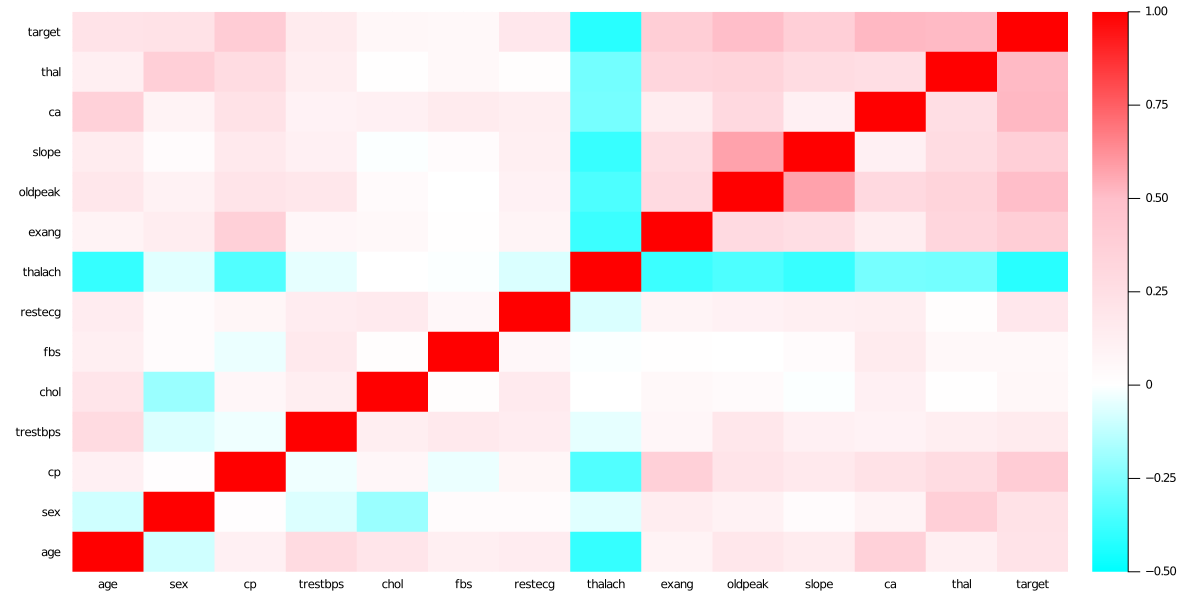

In [58]:
x = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

c1 = heatmap(x, x, matrix, c = cgrad([:aqua, :white , :pink, :red]), clims =(-0.5, 1), size=[800, 600], aspect_ratio = 0.75, discrete_values=true)


### Algumas correlações

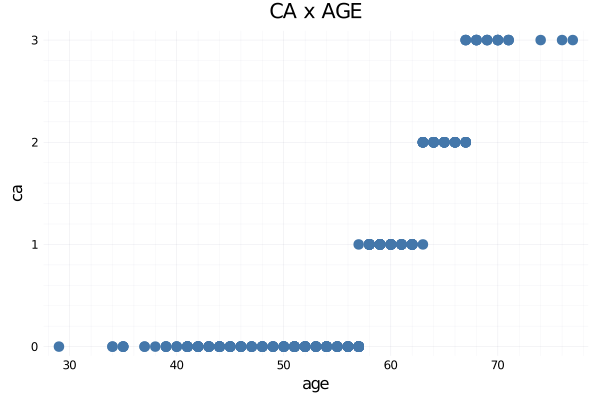

In [12]:
scatter(sort(df.age), sort(df.ca), xlabel = "age", ylabel="ca", title="CA x AGE", leg=false)

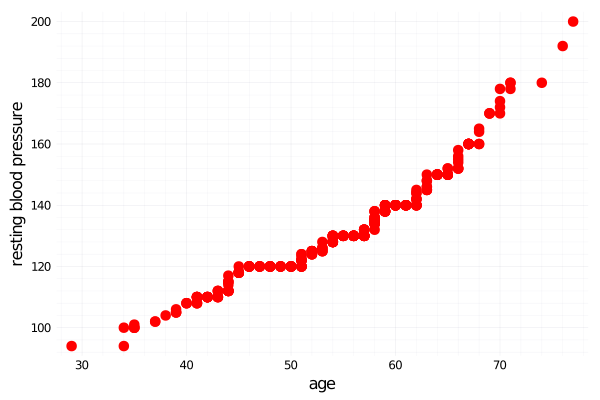

In [13]:
scatter(sort(df.age), sort(df.trestbps), xlabel = "age", ylabel="resting blood pressure", c="red", leg=false)

## Estatística dos atributos do dataset

In [14]:
statsDf = describe(df, :min, :max, :mean, :median, :std, :q25, :q75, :eltype)
insertcols!(statsDf, 7, :var => map(var, eachcol(df)))

,variable,min,max,mean,median,std,var,q25,q75
,Symbol,Real,Real,Float64,Float64,Float64,Float64,Float64,Float64
1,age,29.0,77.0,54.5135,56.0,9.05163,81.932,48.0,61.0
2,sex,0,1,0.675676,1.0,0.468915,0.219881,0.0,1.0
3,cp,1,4,3.16554,3.0,0.958262,0.918266,3.0,4.0
4,trestbps,94.0,200.0,131.649,130.0,17.776,315.985,120.0,140.0
5,chol,126.0,564.0,247.399,243.0,52.0789,2712.21,211.0,276.25
6,fbs,0.0,1.0,0.141892,0.0,0.34953,0.122171,0.0,0.0
7,restecg,0,2,0.993243,1.0,0.994879,0.989785,0.0,2.0
8,thalach,71.0,202.0,149.598,153.0,22.9804,528.099,133.0,166.0
9,exang,0,1,0.327703,0.0,0.470171,0.22106,0.0,1.0


## Distribuição dos dados

In [15]:
using KernelDensity

In [16]:
#KDE age
U = kde(df.age)
pu1 = plot(U, xlabel="age", ylabel="probability", title="Age");

In [17]:
#KDE trestbps
U = kde(df.trestbps)
pu4 = plot(U, xlabel="trestbps", ylabel="probability", title="Resting blood pressure");

In [18]:
#KDE chol
U = kde(df.chol)
pu5 = plot(U, xlabel="chol", ylabel="probability", title="Serum cholestoral");

In [19]:
#KDE thalach
U = kde(df.thalach)
pu8 = plot(U, xlabel="thalach", ylabel="probability", title="maximum heart rate achieved");

In [20]:
#KDE oldpeak
U = kde(df.oldpeak)
pu10 = plot(U, xlabel="oldpeak", ylabel="probability", title="ST depression induced by exercise relative");

## Kernel Density Distribution

In [21]:
l = @layout [a b c; e f;]
png(plot(pu1, pu4, pu5, pu8, pu10, layout=l, leg=false, size=([1200, 600])), "plot3")

## Links uteis

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

https://www.analyticsvidhya.com/blog/2017/10/comprehensive-tutorial-learn-data-science-julia-from-scratch/

https://nextjournal.com/leandromartinez98/tips-to-create-beautiful-publication-quality-plots-in-julia

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/

https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/

https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Multivariable/BS704_Multivariable5.html

https://docs.juliaplots.org/latest/tutorial/

https://juliadata.github.io/DataFrames.jl/stable/